## Importing the Essential Libraries, Metrics

In [682]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from IPython.display import display
from scipy import stats   
import math

In [626]:
housing = pd.read_csv("train.csv")

## Step we will do
> - Analyse data
> - Impute missing values
> - EDA
> - Data Preparation
> - Univariate analysis
> - Bivariate analysis
> - Linear Regression
> - Ridge Regression
> - Lasso Regression
> - Verify result

## Variable Description, Identification, and Correction ##
> Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables (i.e., pandas object, float64 or int64 data types).

In [627]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [628]:
# drop Id column
df = housing
df = df.drop(['Id'],axis =1)

In [629]:
## Shape of Data
display(df.shape)

(1460, 80)

In [630]:
# Let's first inspect how many kinds of data types that we have to deal with.

print(df.dtypes.value_counts())

object     43
int64      34
float64     3
dtype: int64


In [631]:
# Extract numerical variables first.
num_type = df.select_dtypes(include = ['int64', 'float64'])
num_type.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [632]:
#Name of numerical variables and total count
print("Name of variables {}".format(num_type.columns.values))
print("")
print("Number of columns : {}".format(len(num_type.columns)))

Name of variables ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']

Number of columns : 37


In [633]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Insights
> - MSSubClass, OverallQual, OverallCond, MoSold, YrSold are categorical integer values
> - LotFrontage, LotArea, MasVnrArea, BsmtFinSF2, GrLivArea

In [634]:
# Converting MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables as we can see they dont represent actuall numerical data.

df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [635]:
# Check out the data types after correction
print(df.dtypes.value_counts())

object     48
int64      29
float64     3
dtype: int64


## Imputing Missing Variables 

In [636]:
# Columns with missing observation

missing_columns = df.columns[df.isnull().any()].values

# Number of colums with missng observation
total_columns = np.count_nonzero(df.isna().sum())
print('we have', total_columns, 'features with missing values and those features ( with missing values) are: \n\n', missing_columns)

we have 19 features with missing values and those features ( with missing values) are: 

 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


In [637]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


### Insight
> Usually we drop a variable if at least 30% of its values are missing. Hence, one might tempt to drop variables like PoolQC, MiscFeature, Alley, Fence, FireplaceQu. Deleting these variables would be a blunder because data description tells these 'NaN' has some purpose for those variables. Like 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature referes to 'None', and 'NaN' in Alley means 'No alley access' etc. More generally NaN means the absent of that variable. Hence we goona replace NaN with 'None' in those variable. 

In [638]:
# Impute by None where NaN means something.
to_impute = df.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute.columns:
    df[i].fillna('None', inplace = True)

In [639]:
# Electrical is categorical variable and will be imputed by mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [640]:
# The following variables are either discrete numerical or continuous numerical variables. So they will be imputed by median.
to_impute_by_median = df[['MasVnrArea','GarageYrBlt']]
for i in to_impute_by_median:
    df[i].fillna(df[i].median(), inplace = True)

In [641]:
display(df.columns[df.isna().any()].values)

array(['LotFrontage'], dtype=object)

### Insight
> Almost 17.74% observations of LotFrontage are missing in data. Hence, simply imputing LotFrontage by mean or median might introduce bias since the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.

In [642]:
# Let create a function to find the variables correlated with LotFrontage.

def corr(correlation, variable):
    from sklearn.preprocessing import LabelEncoder # Convert categorical variables into numerical
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation['LotFrontage'] = variable
    corr = correlation.corr()
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [643]:
# Correlation of LotFrontage with categorical data
corr(df.select_dtypes(include = ['object']), df.LotFrontage)

LotFrontage    1.000000
OverallQual    0.251646
RoofStyle      0.169799
Exterior2nd    0.107308
Foundation     0.106156
Name: LotFrontage, dtype: float64

LotConfig    -0.208276
GarageType   -0.276750
MSSubClass   -0.337937
BldgType     -0.448537
Utilities          NaN
Name: LotFrontage, dtype: float64

In [644]:
df.select_dtypes(include = ['object'])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,None,None,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,TA,Y,None,None,None,8,2007,WD,Normal
1456,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,TA,TA,Y,None,MnPrv,None,2,2010,WD,Normal
1457,70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,TA,TA,Y,None,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,None,None,None,4,2010,WD,Normal


### Insight
> BldgType has the highest correlation with LotFrontage. So the tactic is to impute missing values of LotFrontage with the median LotFrontage of similar rows according BldgType.

In [645]:
# impute LotFrontage with the median of highest correlated column i.e. BldgType
df['LotFrontage'] = df.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median())).astype(float)

In [646]:
# Check if any missing values are left untreated

print('Missing variables left untreated: ',df.columns[df.isna().any()].values)

Missing variables left untreated:  []


## Exploratory Data Analysis

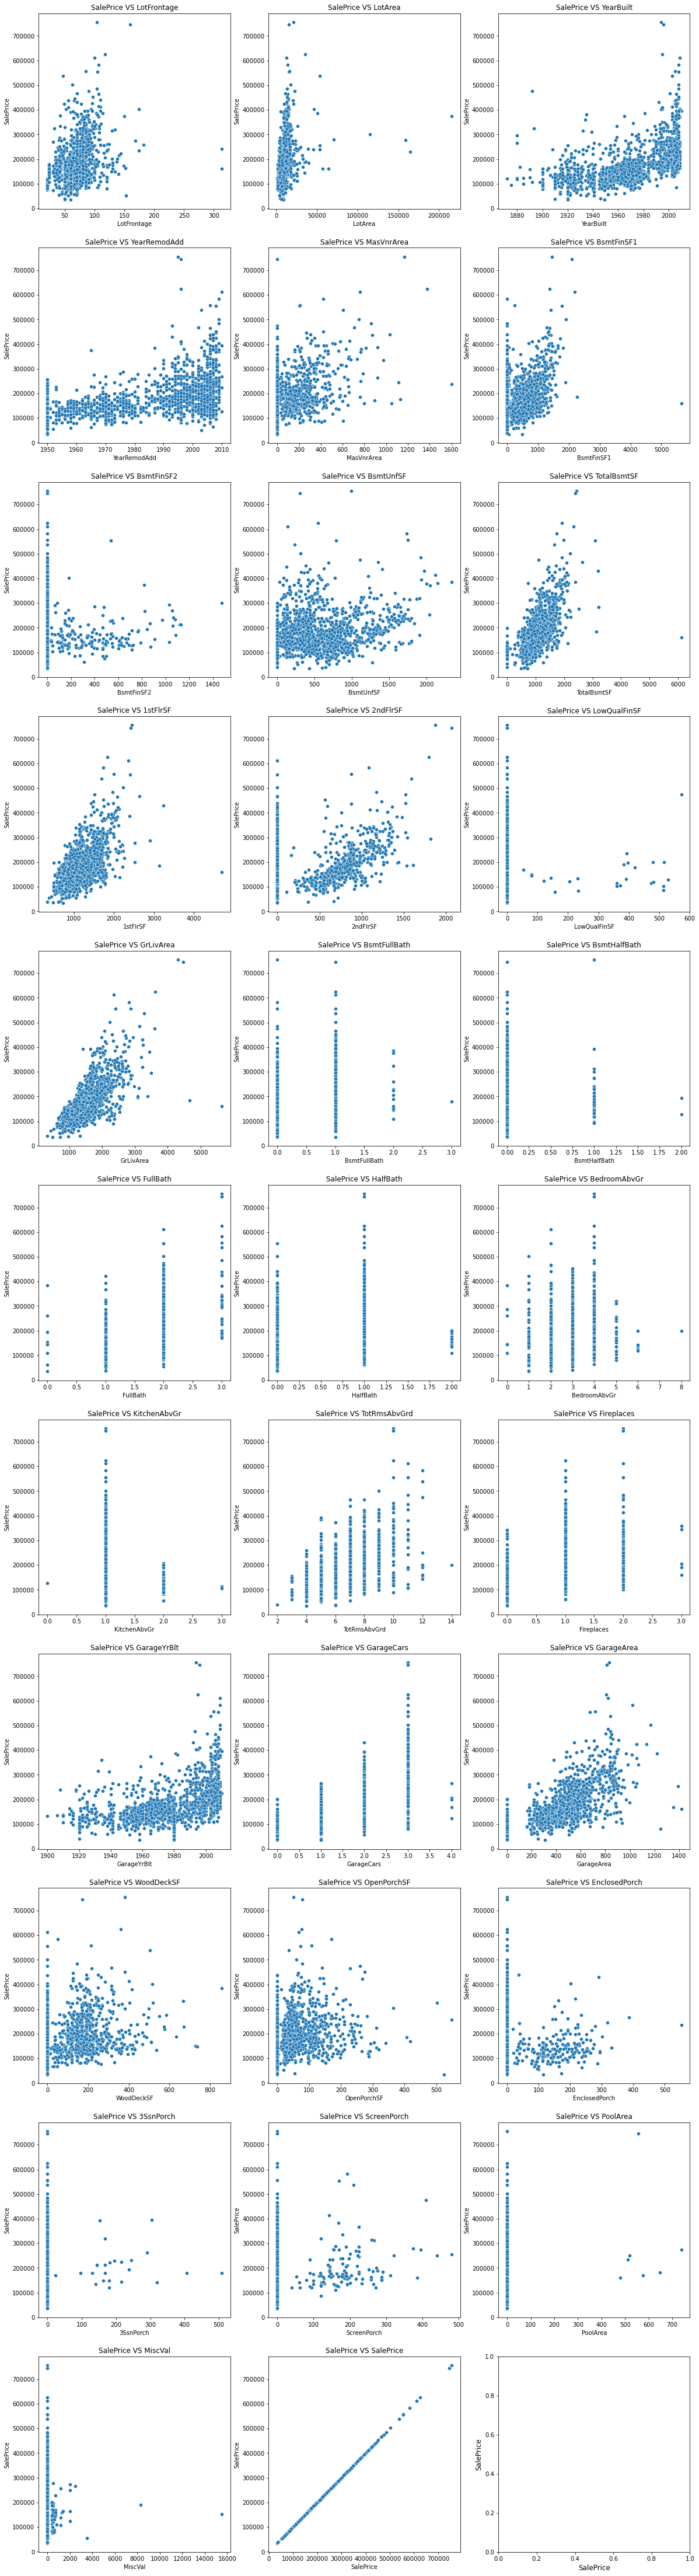

In [647]:
#Visualising numerical predictor variables with Target Variables
fields = df.select_dtypes(include = ['int64', 'float64'])
fig,axs= plt.subplots(11,3,figsize=(20,80))
for i,ax in zip(fields.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', data=fields,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

plt.show()

#### Insights
> - New Property or Newly remodel property rates are higher
> - GrLivArea, garage area, 1st floor, 2nd floor and large number of rooms increases the Sales Price
> - Numerical data are not negatively implacting the Sales Price

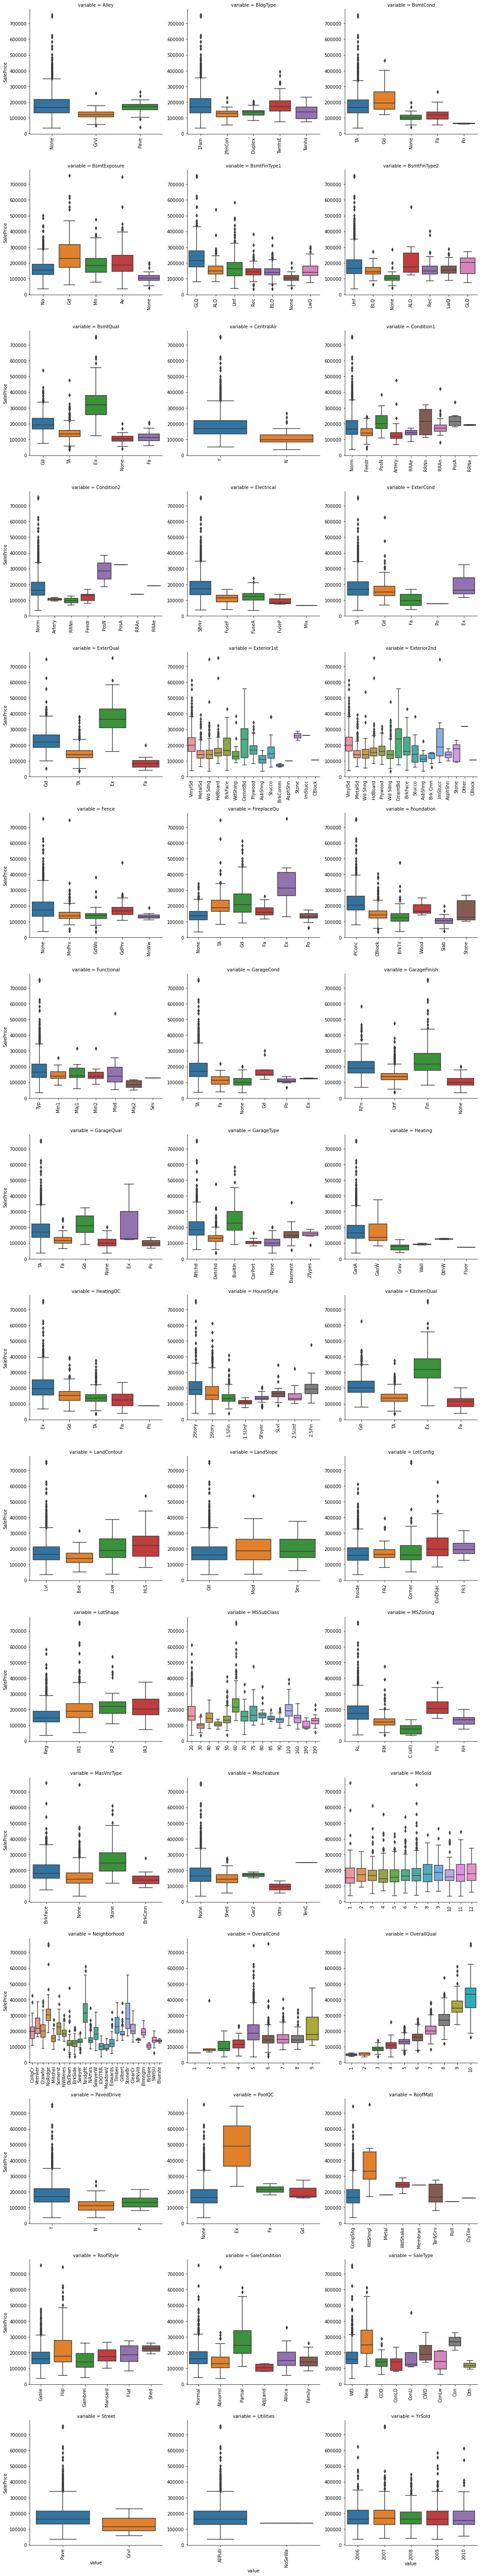

In [648]:
# Create boxplots to see the association between categorical and target variables.
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

#### Insights
> - Categorical paratemers like ExterQual, FirePlaces, KitchenQual, PoolQc with excellent rating have high Sales Price
> - RoofMatl (WdShngl), SaleType (New, Con) also have high Sales prices.
> - Overall material and finish of the house increases sales price
> - High height of the basement of basement have high sales prices.
> - Near positive off-site feature--park, greenbelt are generally sold at higher price

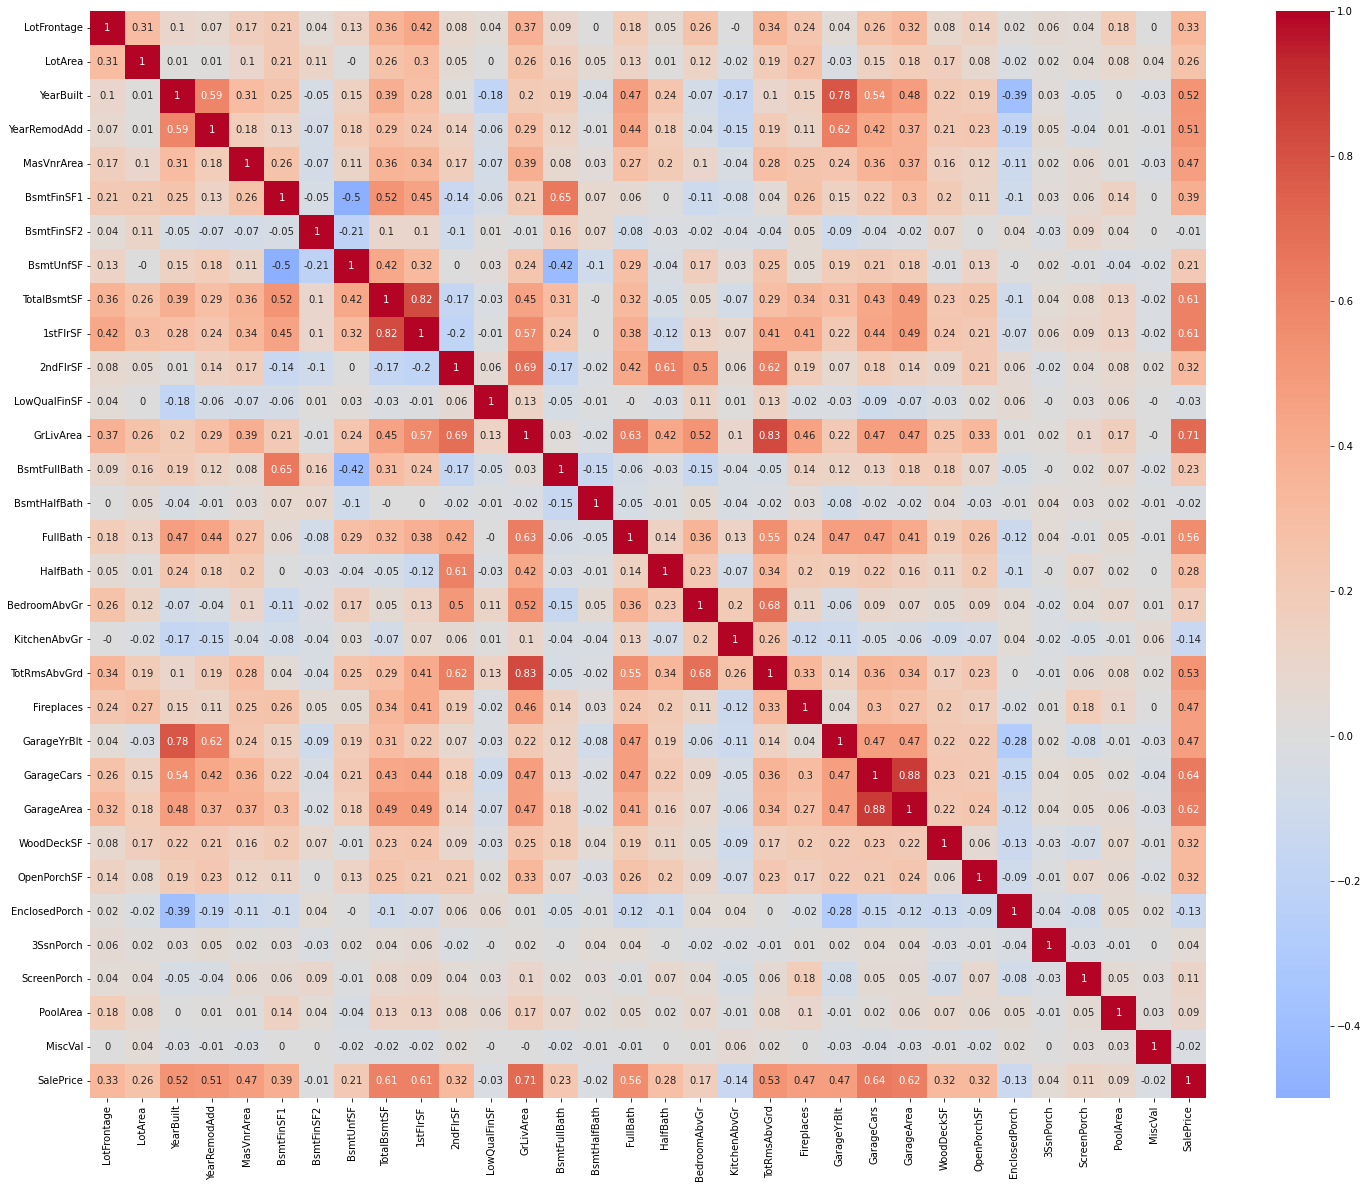

In [649]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(fields.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

#### Insights
> - GarageYrBlt, YearRemodAdd is highly correlated with Yearbuilt
> - GarageCars is highly correlated with GarageArea
> - TotalRmsAbvGrd, fullbath, halfbath is highly correlated with GrLivArea
> - TotalBasmtSf is highly correlated with 1stFlrSf
> - BsmtFullBath is highly correlated with BsmtFinType1

In [650]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [651]:
y=df.SalePrice
df.drop('SalePrice', axis = 1, inplace = True)
X = df

In [688]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(corr_result[(abs(corr_result) > 0.6)])

YearBuilt             GarageYrBlt              0.777182
                      OverallCond_5            0.611566
                      Foundation_PConc         0.651199
                      BsmtQual_TA             -0.631734
YearRemodAdd          GarageYrBlt              0.616444
MasVnrArea            MasVnrType_None         -0.687737
BsmtFinSF1            BsmtFullBath             0.649212
                      BsmtFinType1_Unf        -0.628690
BsmtFinSF2            BsmtFinType2_Unf        -0.716235
BsmtUnfSF             BsmtFinType1_Unf         0.602707
TotalBsmtSF           1stFlrSF                 0.819530
2ndFlrSF              GrLivArea                0.687501
                      HalfBath                 0.609707
                      TotRmsAbvGrd             0.616423
                      MSSubClass_20           -0.602706
                      MSSubClass_60            0.687063
                      HouseStyle_1Story       -0.788749
                      HouseStyle_2Story        0

In [689]:
X.drop(['YearBuilt','YearRemodAdd','OverallQual_1','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc'],
         axis=1,inplace=True)

In [690]:
## Scaling
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [691]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [692]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

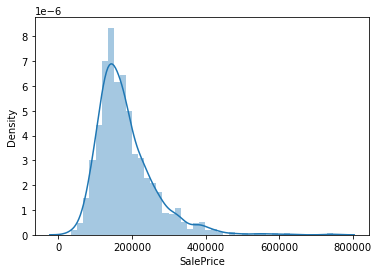

In [693]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

The Data is right-skewed. Tus we transform it to make it more gaussian.

In [694]:
#Transforming the Target feature to make the data gaussian
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

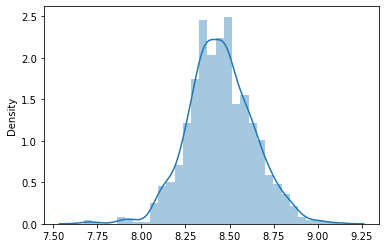

In [695]:
sns.distplot(y_train)
plt.show()

The target variable is now transformed.

In [696]:
# Scaling the data using a Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [697]:
X_train.head()

,LotFrontage,LotArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_70,MSSubClass_180,MSZoning_C (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterCond_Ex,ExterCond_Fa,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_TA,BsmtCond_Fa,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,0.202055,0.042534,0.0,0.000000,0.0,0.416667,0.636364,

## Ridge Regression

In [698]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

Fitting 11 folds for each of 28 candidates, totalling 308 fits


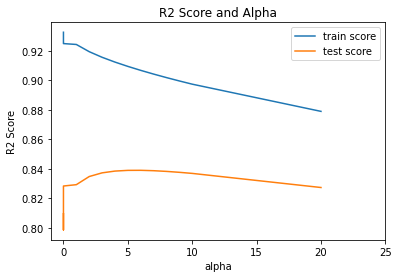

The optimum alpha is 6
The R2 Score of the model on the test dataset for optimum alpha is 0.8592045276891024
The MSE of the model on the test dataset for optimum alpha is 0.005288975811997676


In [699]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [700]:
# Chekcing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
128,Exterior1st_VinylSd,inf
200,FireplaceQu_TA,inf
103,OverallCond_8,inf
102,OverallCond_7,inf
101,OverallCond_6,inf
100,OverallCond_5,inf
99,OverallCond_4,inf
98,OverallCond_3,inf
97,OverallCond_2,inf
96,OverallCond_1,inf


In [701]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Now we have all the columns which do not suffer from multicolinearity

Fitting 11 folds for each of 28 candidates, totalling 308 fits


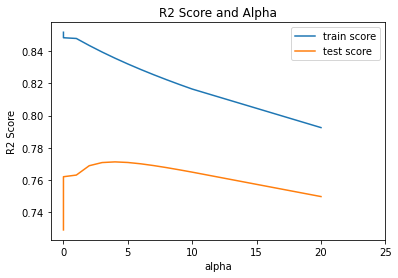

The optimum alpha is 4
The R2 Score of the model on the test dataset for optimum alpha is 0.8165767988935074
The MSE of the model on the test dataset for optimum alpha is 0.006890284595723729


In [704]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [705]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

,Ridge Co-Efficient
TotRmsAbvGrd,0.257951
GarageArea,0.231648
CentralAir_Y,0.085940
BsmtFullBath,0.081712
HouseStyle_2.5Unf,0.070030
LotArea,0.069106
KitchenQual_Ex,0.065746
Neighborhood_Veenker,0.063030
LandContour_HLS,0.060947
ScreenPorch,0.060938


The Top 20 features impacting the price of the property is stated above.

## Lasso
For demonstration purposes, we try a Lasso Model as well to check it's overall perfromance.

In [706]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8246954587070865
The MSE of the model on the test dataset for optimum alpha is 0.0065853074918787915


There are total 75 features used in the Lasso Model

Fitting 11 folds for each of 11 candidates, totalling 121 fits


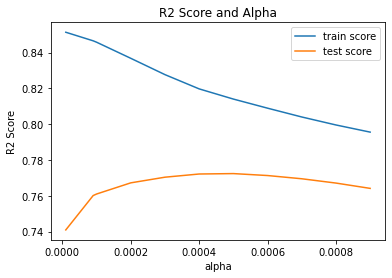

The optimum alpha is 0.0005
The R2 Score of the model on the test dataset for optimum alpha is 0.8033443718441675
The MSE of the model on the test dataset for optimum alpha is 0.0073873601440300205


In [707]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [708]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
TotRmsAbvGrd,0.354508
GarageArea,0.275784
CentralAir_Y,0.092455
BsmtFullBath,0.082068
KitchenQual_Ex,0.061457
BsmtQual_Ex,0.058265
ScreenPorch,0.056778
Alley_Pave,0.041780
MSSubClass_70,0.041193
LandContour_HLS,0.037043


### The Final Ridge Regression Model is as follows:-

In [709]:
ridge_final2

Ridge(alpha=4, random_state=100)

### The Final Lasso Regression Model is as follows:-

In [710]:
lasso_final2

Lasso(alpha=0.0005, random_state=100)

### Double the value of alpha for both ridge and lasso

In [711]:
# Building Ridge Model by doubling the value of alpha to 8
ridge_double = Ridge(alpha=8,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8098575846129477
The MSE of the model on the test dataset for doubled alpha is 0.007142691588805416
The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
TotRmsAbvGrd,0.211136
GarageArea,0.196325
CentralAir_Y,0.082977
BsmtFullBath,0.073251
KitchenQual_Ex,0.065978
BsmtQual_Ex,0.060834
ScreenPorch,0.056436
HouseStyle_2.5Unf,0.052358
LotArea,0.052048
LandContour_HLS,0.049869


In [712]:
# Building Lasso Model by doubling the value of alpha to 0.001
lasso_double = Lasso(alpha=0.001,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.7921022599862997
The MSE of the model on the test dataset for doubled alpha is 0.0078096695884753665
The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
TotRmsAbvGrd,0.342215
GarageArea,0.272955
CentralAir_Y,0.087850
BsmtFullBath,0.066631
BsmtQual_Ex,0.059166
KitchenQual_Ex,0.058768
ScreenPorch,0.035208
BsmtCond_TA,0.032325
MSSubClass_70,0.031268
Condition1_Norm,0.024654


In [713]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['TotRmsAbvGrd','GarageArea','CentralAir_Y','BsmtFullBath','BsmtQual_Ex'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['TotRmsAbvGrd','GarageArea','CentralAir_Y','BsmtFullBath','BsmtQual_Ex'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7657348654979234
The MSE of the model on the test dataset is 0.008800159619053068
The most important predictor variables are as follows:


,Lasso Co-Efficient
LotArea,0.371506
LotFrontage,0.171816
HouseStyle_2.5Fin,0.168834
RoofMatl_WdShngl,0.123541
HouseStyle_2.5Unf,0.114562
